In [1]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt

### 1. Read in the default databases. 

In [9]:
community = pd.read_csv ('../OmniPath/LR_database.csv', index_col=None)

**Note:** CellPhoneDB uses sql database with multiple tables, we export these tables into csv and re-organise the pairs into one single dataframe.

This steps are discussed in detail within the notebook where we do the conversion and re-structering for CPDB

notebook is located at /RestructureCPDB/BreakdownCPDB.ipynb

In [10]:
cpdb = pd.read_csv ('cpdb_original.csv', index_col=None)

In [11]:
nnet_lr = pd.read_csv ('lr_network.csv', index_col=None)

### 2. Comparing pairs

In [12]:
#create pairs in nnet
nnet_lr["pairs"]=nnet_lr["from"] + "_" + nnet_lr["to"]

In [13]:
#get unique list of pairs in community
community_pairs = set(community['Pair.Name'])

In [14]:
#get unique list of pairs in cpdb

cpdb_pairs = set(cpdb['pairs'])

In [15]:
#get unique list of pairs in nnet

nnet_pairs = set(nnet_lr['pairs'])

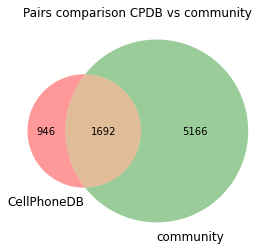

In [17]:
#plot pairs of CellPhoneDB vs community
venn2([cpdb_pairs, community_pairs], ('CellPhoneDB', 'community'))
plt.title("Pairs comparison CPDB vs community")
plt.savefig('ComparisonFigures/pairs_cpdb-community.pdf')

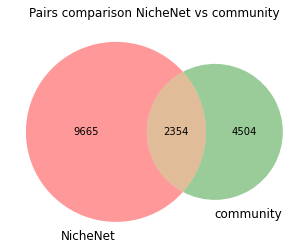

In [18]:
#plot pairs of NicheNet vs community
venn2([nnet_pairs, community_pairs], ('NicheNet', 'community'))
plt.title("Pairs comparison NicheNet vs community")
plt.savefig('ComparisonFigures/pairs_NicheNet-community.pdf')

In [19]:
#nnet predicted 10.629 pairs, lets see how does the comparison look without the predicted pairs
nnet_nopridcition=nnet_lr[~nnet_lr["database"].str.contains("ppi_")]

In [20]:
nopredict_pairs=set(nnet_nopridcition["pairs"])

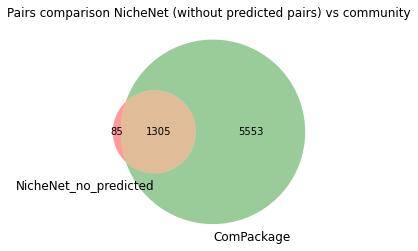

In [22]:
#plot pairs of NicheNet without predicted pairs vs community

venn2([nopredict_pairs, community_pairs], ('NicheNet_no_predicted', 'ComPackage'))
plt.title("Pairs comparison NicheNet (without predicted pairs) vs community")
plt.savefig('ComparisonFigures/pairs_NicheNet_no_predicted-community.pdf')

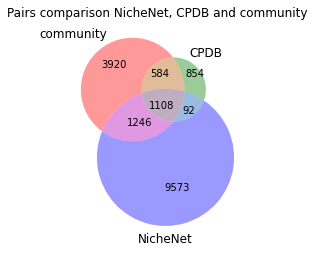

In [26]:
#plot pairs of 3 DBs in one

venn3([community_pairs,cpdb_pairs, nnet_pairs], ("community",'CPDB', 'NicheNet'))
plt.title("Pairs comparison NicheNet, CPDB and community")
plt.savefig('ComparisonFigures/pairs_3in1.pdf')

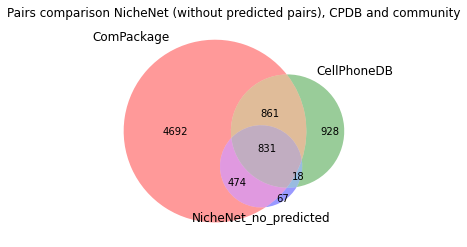

In [27]:
#plot pairs of 3 DBs in one, but in this one we do not include the predicted pairs for NicheNet
venn3([community_pairs,cpdb_pairs, nopredict_pairs], ("ComPackage",'CellPhoneDB', 'NicheNet_no_predicted'))
plt.title("Pairs comparison NicheNet (without predicted pairs), CPDB and community")
plt.savefig('ComparisonFigures/pairs_3in1_NoPredicted.pdf')

### 2. Comparing gene space

In [35]:
#gene unique gene space from NNet
nnet_gs=set(list(nnet_lr["from"]) + list(nnet_lr["to"]))

In [39]:
#gene unique gene space from cpdb
cpdb_gs=set(list(cpdb["ligand"]) + list(cpdb["receptor"]))

In [41]:
#gene unique gene space from community
community_gs=set(list(community["Ligand"]) + list(community["Receptor"]))

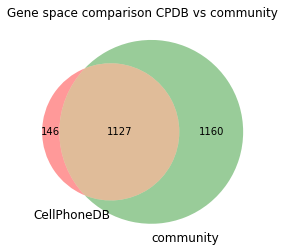

In [42]:
#plot genespace of CellPhoneDB vs community
venn2([cpdb_gs, community_gs], ('CellPhoneDB', 'community'))
plt.title("Gene space comparison CPDB vs community")
plt.savefig('ComparisonFigures/gs_cpdb-community.pdf')

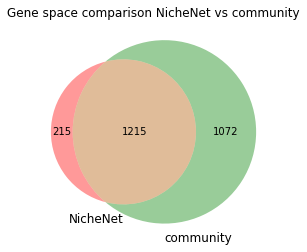

In [43]:
#plot genespace of NicheNet vs community
venn2([nnet_gs, community_gs], ('NicheNet', 'community'))
plt.title("Gene space comparison NicheNet vs community")
plt.savefig('ComparisonFigures/gs_NicheNet-community.pdf')

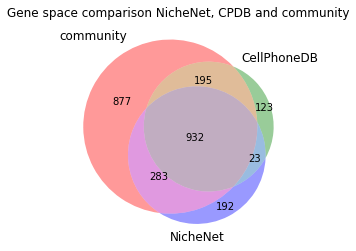

In [44]:
#plot genespace of 3 DBs in one
venn3([community_gs,cpdb_gs, nnet_gs], ("community",'CellPhoneDB', 'NicheNet'))
plt.title("Gene space comparison NicheNet, CPDB and community")
plt.savefig('ComparisonFigures/gs_3in1.pdf')